## Data Viz

In [2]:
import re
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns


In [3]:
# Importation du fichier de scraping
df = pd.read_csv(r'C:\Users\Qw\Desktop\projet_gaming\vgsales_Zak.csv')

df.head()

,Rank,Name,developper,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,...,Global_Sales,gamename,metaNote,metaNbVote,userNote,userNbVote,samename,Like_Percent,metaNoteQ,serieB
0,1,Wii Sports,Nintendo,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,...,82.74,Wii Sports,76,51,8.1,453,1,0.96,4,1
1,2,Super Mario Bros.,Nintendo,NES,1985,Platform,Nintendo,29.08,3.58,6.81,...,40.24,Classic NES Series: Super Mario Bros.,84,14,8.5,98,1,0.92,4,1
2,3,Mario Kart Wii,Nintendo,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,...,35.82,Mario Kart Wii,82,73,8.4,1047,1,0.96,4,0
3,4,Wii Sports Resort,Nintendo,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,...,33.00,Wii Sports Resort,80,73,8.2,293,1,0.97,4,1
4,6,Tetris,Nintendo,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,...,30.26,Tetris 99,83,27,8.2,258,1,0.00,4,0


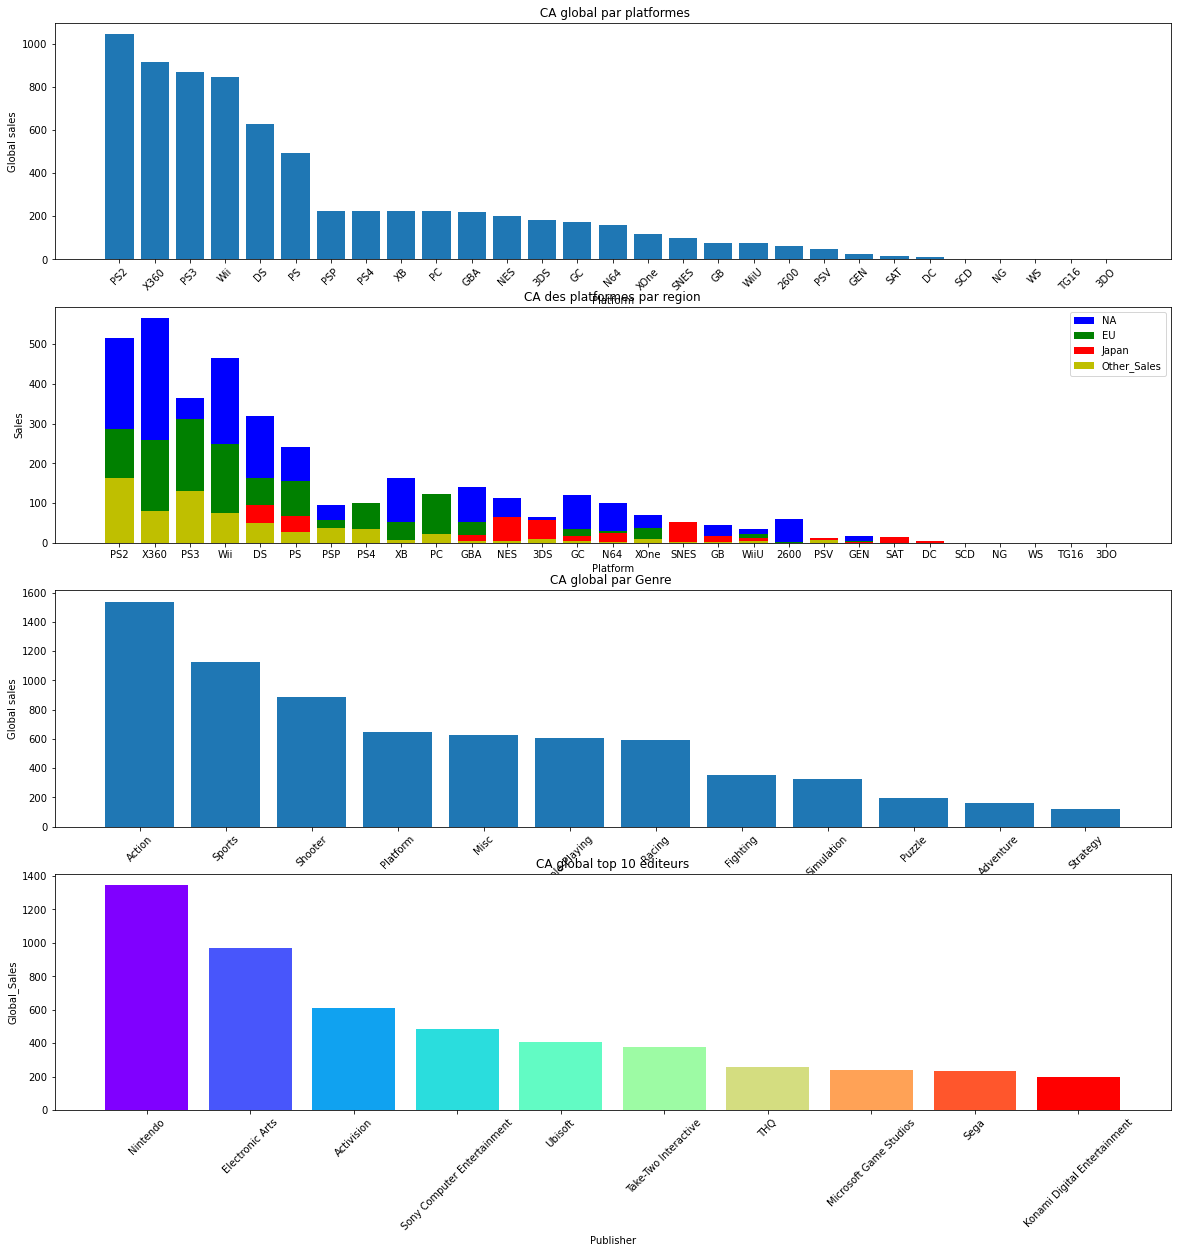

<Figure size 1440x1440 with 0 Axes>

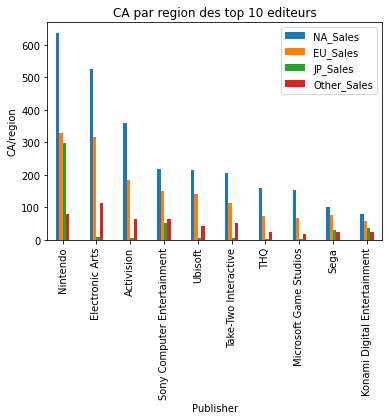

In [4]:
# CA par platforme: platforme la plus utilisée
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
df_plf_glo=df.groupby('Platform', as_index = False).agg({'Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False)
plt.bar(df_plf_glo['Platform'], df_plf_glo['Global_Sales'])
plt.xlabel('Platform')
plt.ylabel('Global sales')
plt.xticks(rotation = '45')
plt.title(' CA global par platformes');

plt.subplot(4,1,2)
df_reg_pla = df.groupby('Platform', as_index = False).agg({'NA_Sales':'sum','EU_Sales':'sum'
                                                           ,'JP_Sales':'sum','Other_Sales':'sum'
                                                          ,'Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False)
plt.bar(df_reg_pla['Platform'],df_reg_pla['NA_Sales'], color='blue',label='NA')
plt.bar(df_reg_pla['Platform'],df_reg_pla['EU_Sales'], color='green',label='EU')
plt.bar(df_reg_pla['Platform'],df_reg_pla['JP_Sales'], color='r',label='Japan')
plt.bar(df_reg_pla['Platform'],df_reg_pla['Other_Sales'], color='y',label='Other_Sales')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('CA des platformes par region')
plt.legend()

plt.subplot(4,1,3)
df_gen_glo = df.groupby('Genre', as_index = False).agg({'Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False)
plt.bar(df_gen_glo['Genre'], df_gen_glo['Global_Sales'])
plt.xlabel('Genre')
plt.ylabel('Global sales')
plt.xticks(rotation = '45')
plt.title('CA global par Genre ');

plt.subplot(4,1,4)
df_group2=df.groupby('Publisher',as_index = False).agg({'Global_Sales':'sum'})
top10 = df_group2.sort_values('Global_Sales', ascending = False).head(10)
plt.bar(top10['Publisher'], top10['Global_Sales'],color = cm.rainbow(np.linspace(0, 1, len(top10))))
plt.xlabel('Publisher')
plt.ylabel('Global_Sales')
plt.xticks(rotation = '45')
plt.title("CA global top 10 editeurs");


plt.figure(figsize=(20,20))
df_reg_publi = df.groupby(df['Publisher'], as_index = False).agg({'NA_Sales':'sum','EU_Sales':'sum'
            ,'JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'}).sort_values('Global_Sales'
             , ascending=False).head(10)
df_reg_publi.plot.bar(x ='Publisher',y =['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],stacked=False, width=0.4)
plt.xticks(rotation = '90')
plt.xlabel('Publisher')
plt.ylabel('CA/region')
plt.title("CA par region des top 10 editeurs");